In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
### Exploratory Data Analysis

In [3]:
# Read and load dataset
filepath = '/content/SampleSuperstore.csv'

In [6]:
superstore_df = pd.read_csv(filepath)

In [7]:
superstore_df.shape

(9994, 13)

In [8]:
superstore_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
superstore_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
# To check the null values
superstore_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
missing_values = superstore_df.isnull()
missing_counts = missing_values.sum()
print(missing_counts)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [13]:
superstore_df = superstore_df.dropna()

In [14]:
superstore_df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [15]:
superstore_df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [16]:
superstore_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [17]:
superstore_df['Sales'].unique()

array([261.96 , 731.94 ,  14.62 , ..., 437.472,  97.98 , 243.16 ])

In [18]:
no_of_states=superstore_df['State'].nunique()
"There are %d states in this df."%no_of_states

'There are 49 states in this df.'

In [19]:
superstore_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [20]:
# Lower the string values small alphabetic
superstore_df.columns.str.lower()

Index(['ship mode', 'segment', 'country', 'city', 'state', 'postal code',
       'region', 'category', 'sub-category', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [21]:
# Visualise data

In [22]:
print(superstore_df.columns)


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


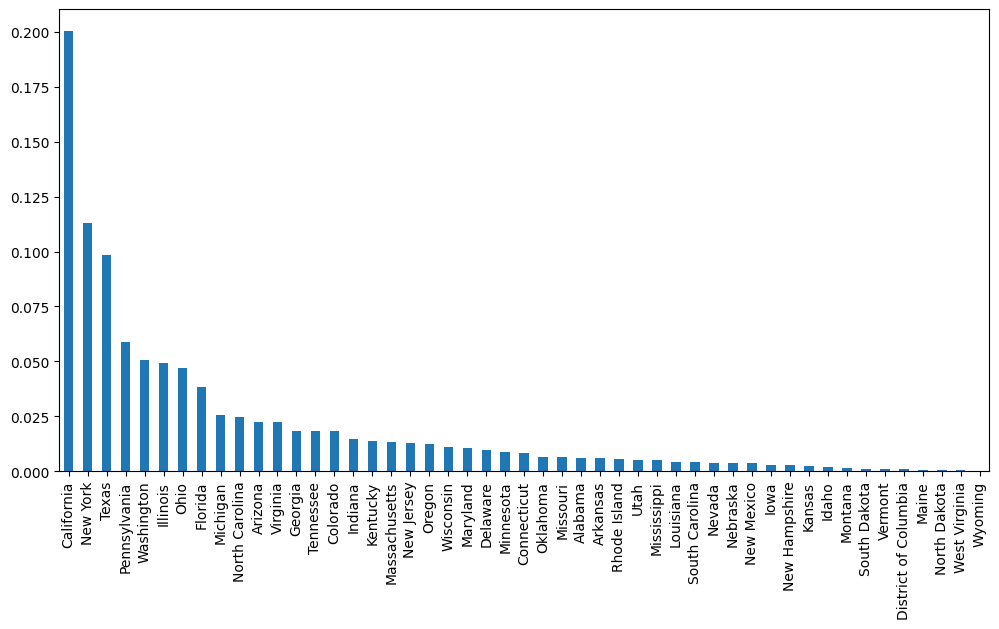

In [23]:
plt.figure(figsize = (12,6))
superstore_df['State'].value_counts(1).plot(kind='bar')
plt.show()

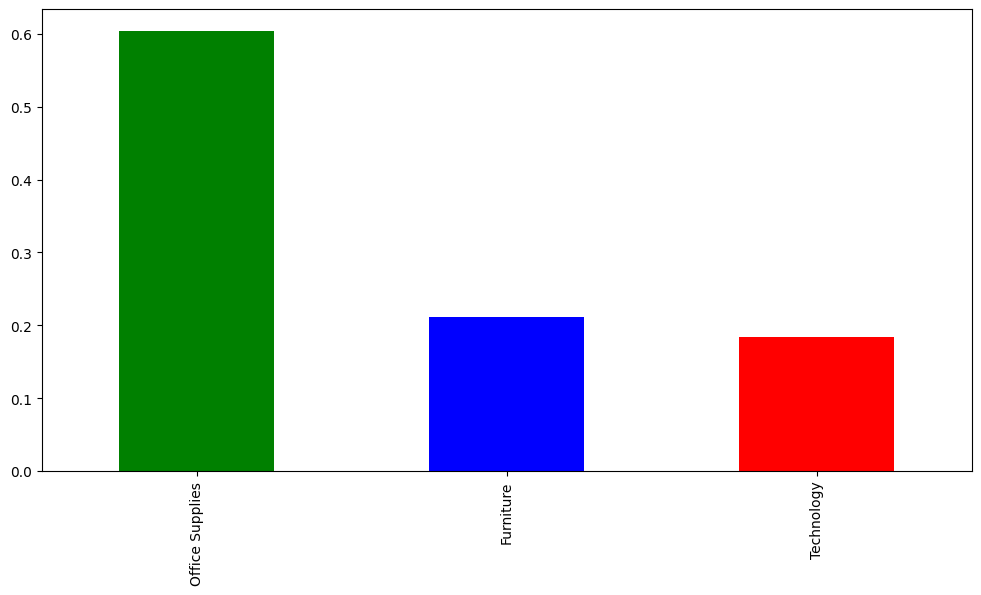

In [24]:
plt.figure(figsize = (12,6))
superstore_df['Category'].value_counts(1).plot(kind='bar', color = ["green", "blue", "red"])
plt.show()

In [27]:
# from the above bar it is showing that it needs improvemwnt in Technology category

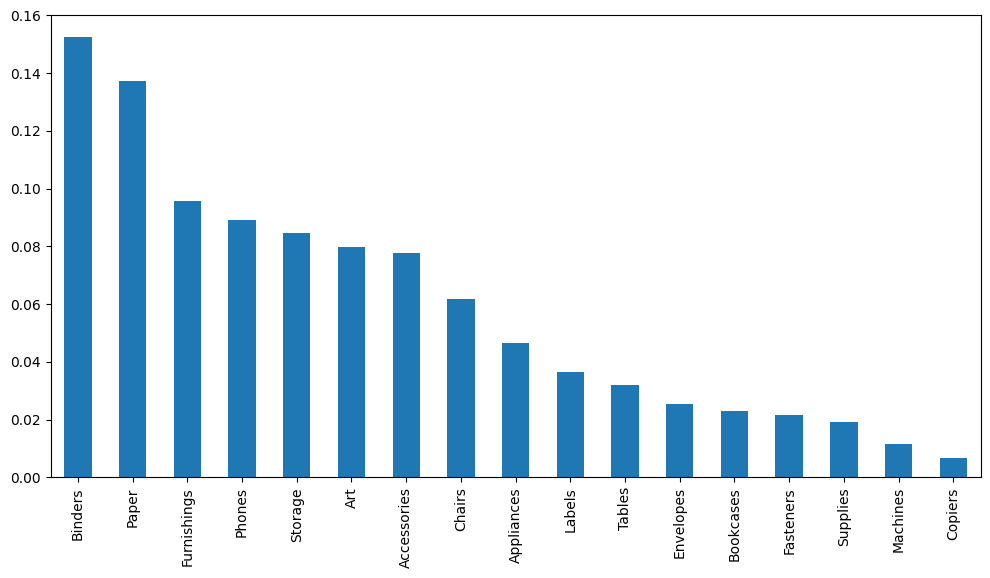

In [25]:
plt.figure(figsize = (12,6))
superstore_df['Sub-Category'].value_counts(1).plot(kind='bar')
plt.show()

In [ ]:
# Machine and Copies need improvement there is hidden potential but first build comprehensive business plan to gain maximum sale and profit

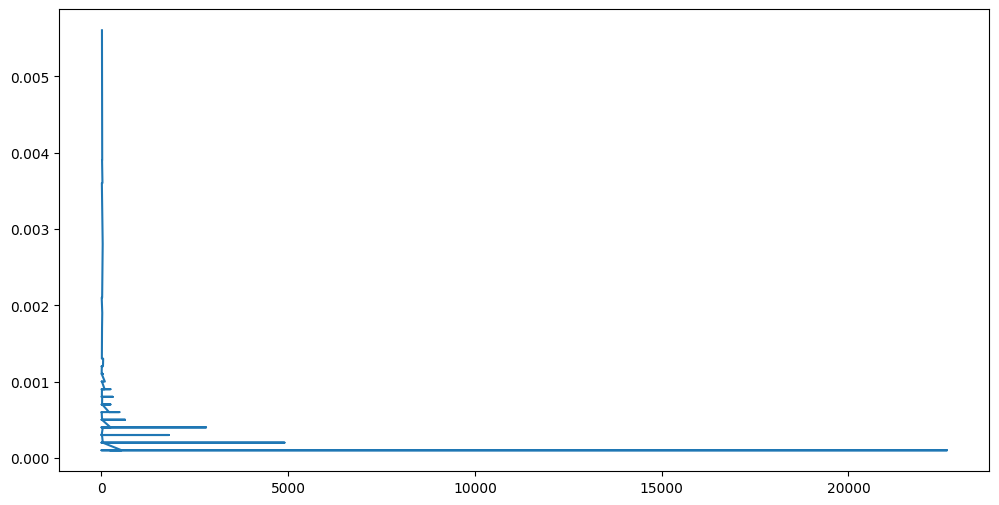

In [26]:
plt.figure(figsize = (12,6))
superstore_df['Sales'].value_counts(1).plot(kind='line')
plt.show()

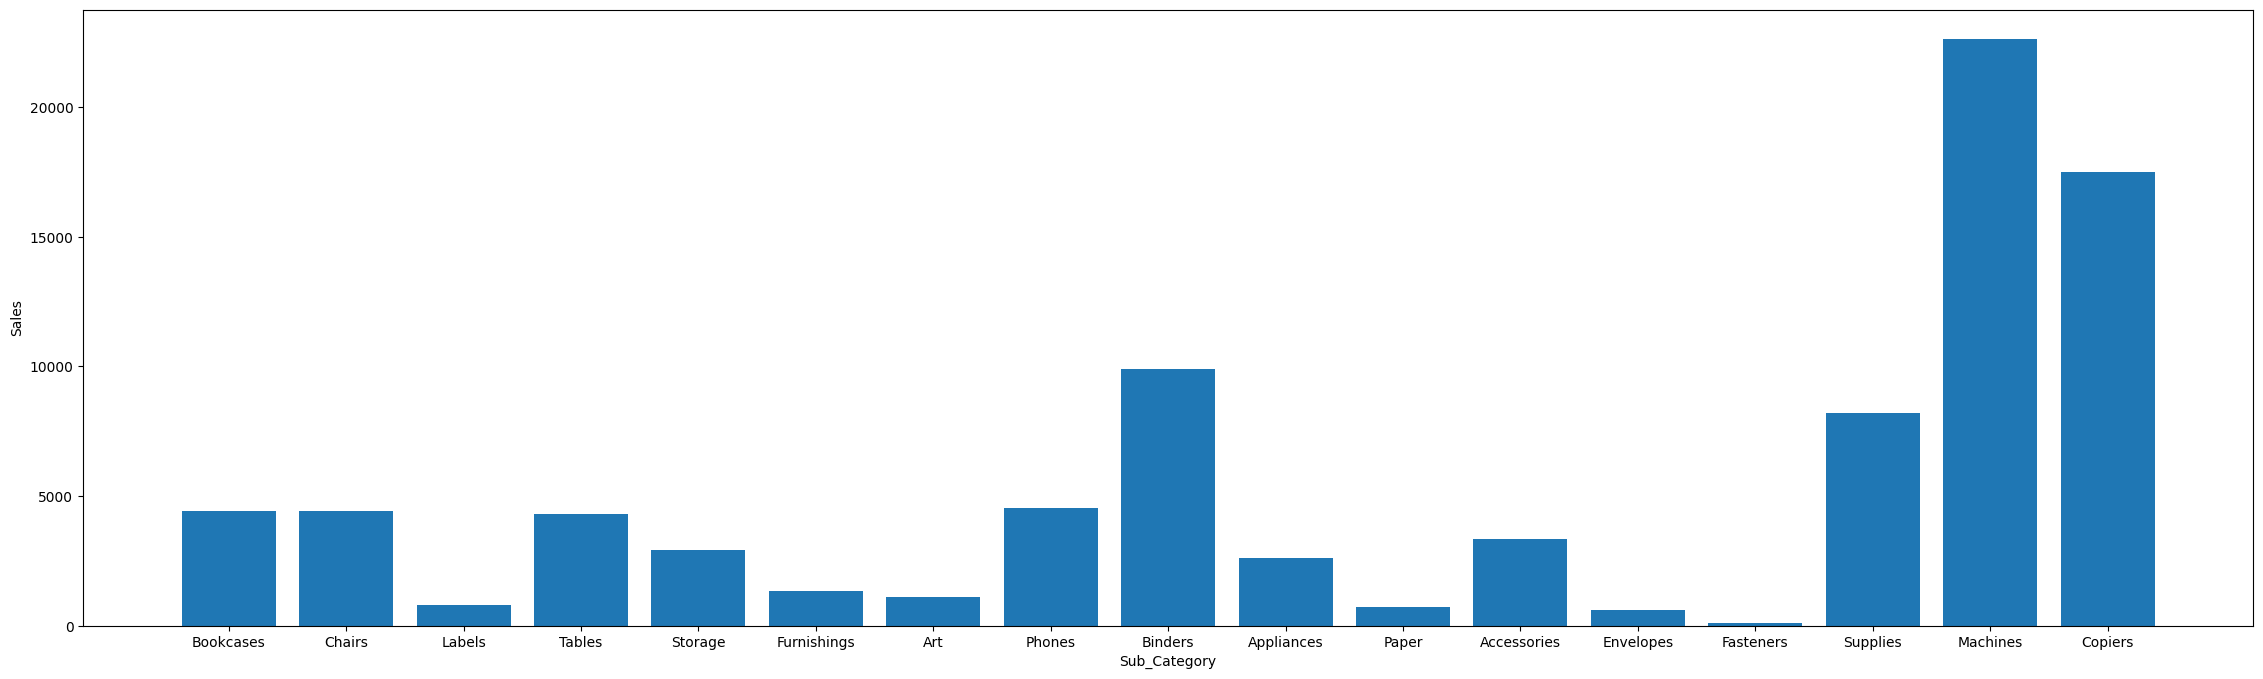

In [28]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(superstore_df['Sub-Category'],superstore_df['Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Sub_Category');
plt.ylabel('Sales');

In [ ]:
#Labels, Furnishings, Art, paper, Envelopes, etc., sub-categories have very fewer sales, that’s why it needs to be improved.

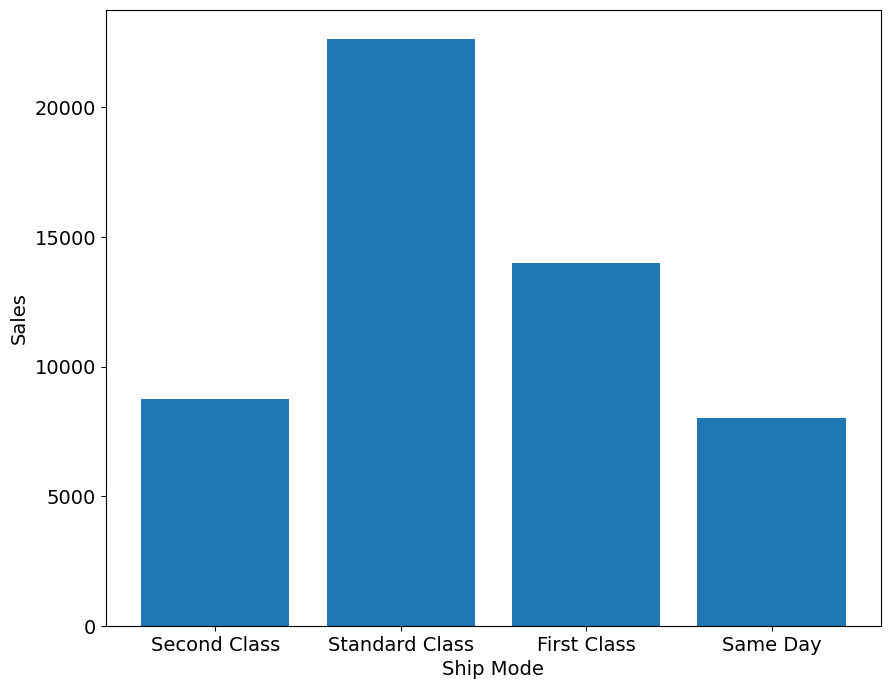

In [31]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(superstore_df['Ship Mode'],superstore_df['Sales'],);
plt.rcParams.update({'font.size':14});
plt.xlabel('Ship Mode');
plt.ylabel('Sales');

<ipython-input-32-abfbfb38175d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  superstore_df.corr()
<ipython-input-32-abfbfb38175d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(superstore_df.corr(),cmap='Reds',annot=True);


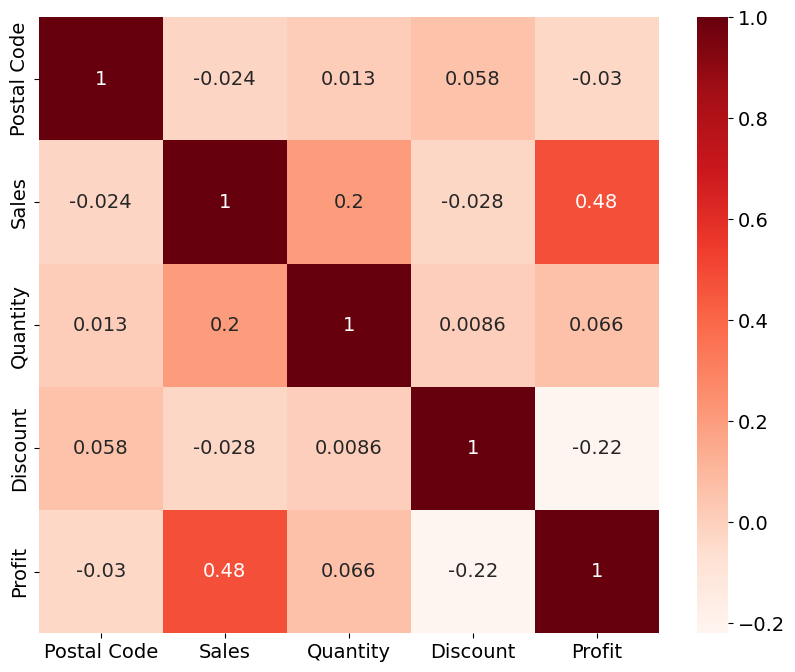

In [32]:
superstore_df.corr()
sns.heatmap(superstore_df.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(10,5)

In [37]:
#from heat map the report shows some relation between different variables.
#Discount and Profit are Negatively Correlated
#Sales and Profit are Moderately Correlated

In [35]:
#The main reason which leads to loss is Discount as if some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts, hence it needs to be improved.
#It is better to give more discounts during festival seasons, additionally, that will result in more sales.
#the Home office segment needs better improvement.
#Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.